In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Загрузим готовый датасет Breast Cancer из библиотеки Sklearn

In [2]:
X, y = load_breast_cancer(return_X_y = True)

## Разделим данные на train и test в пропорции 85/15

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, shuffle=True, random_state=0)

## Нормализуем данные

In [4]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

## Выберем нужное количество соседей для алгоритма K-NN в sklearn

In [5]:
# Создадим вектор с количеством соседей, которых мы бы хотели попробовать - от 3 до 33 (только нечетные)
neighbors = np.arange(3, 34, 2)

# Создадим пустые списки для храниния train and test accuracy для предсказаний с разным количеством соседей k
accuracy_train = []
accuracy_test = []

# Создадим пустые списки для храниния train and test precision для предсказаний с разным количеством соседей k
precision_train = []
precision_test = []

# Запустим цикл и пройдемся по всем значениям k в списке neighbors
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Сделаем предсказания как для train set, так и для test
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # В каждом повторении цикла для разных k будем записывать значения accuracy/precision  в соответствующие списки
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))

    precision_train.append(precision_score(y_train, y_train_pred))
    precision_test.append(precision_score(y_test, y_test_pred))


## Начертим график train and test accuracy

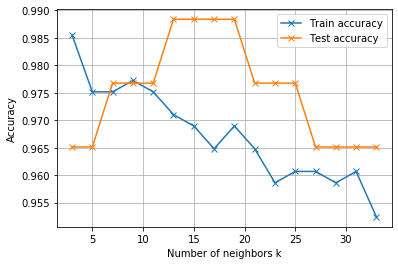

In [6]:
# Как видно из графика, точность предсказаний на проверочной выборке не становится больше после n=13
# А точность предсказаний на обучающей выборке только падает при увеличении количества соседей
# Поэтому можно оставить n = 13
plt.plot(neighbors, accuracy_train, label="Train accuracy", marker='x')
plt.plot(neighbors, accuracy_test, label="Test accuracy", marker='x')
plt.xlabel("Number of neighbors k")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

## Начертим график train and test precision

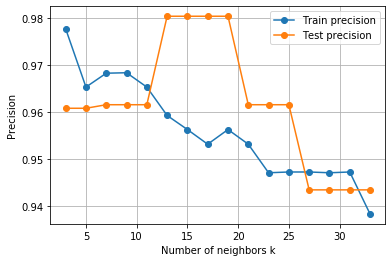

In [7]:
# Здесь также видно, что меткость предсказаний на проверочной выборке не становится больше после n=13
# А меткость предсказаний на обучающей выборке только падает при увеличении количества соседей
# Поэтому можно оставить n = 13
plt.plot(neighbors, precision_train, label="Train precision", marker='o')
plt.plot(neighbors, precision_test, label="Test precision", marker='o')
plt.xlabel("Number of neighbors k")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

## Тренируем K-NN классификатор с N=13

In [8]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

## Смотрим на метрики оценки

In [9]:
cmat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n" , cmat)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.3f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %.3f' % f1)

Confusion matrix:
 [[35  1]
 [ 0 50]]
Accuracy: 0.988
Precision: 0.980
Recall: 1.000
F1 score: 0.990
